Суть того, что я тут делаю, такова. Я подаю на вход модели значения m монеток (0/1).
На основании этих данных она делает предсказание для заданного массива данных (он генерируется случайно, его длина N).
И я получаю точность модели. Задача - найти такое m, при котором точность почти 100% и такое m, при котором точность невелика.

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib as plt

In [ ]:
def getAccuracy(m, N, digits_num):
  predict = np.random.randint(digits_num, size=N)
  train = np.empty(shape=(N, m))
  for i in range(N):
    train[i] = np.random.randint(2, size=m)
  rfr = RandomForestClassifier()
  rfr.fit(train, predict)
  return rfr.score(train, predict)

In [ ]:
def printAccuracy(N, m, digits_num, num_loops):
  acc_sum = 0
  for i in range(num_loops):
    acc_sum += getAccuracy(m, N, digits_num)
  acc_sum /= num_loops
  print(f'For N = {N}, m = {m}, digits_num = {digits_num}, accuracy is {acc_sum}')

In [ ]:
printAccuracy(15, 10, 2, 10)

For N = 15, m = 10, digits_num = 2, accuracy is 0.9933333333333334


In [ ]:
printAccuracy(10**3, 15, 2, 20)

For N = 1000, m = 15, digits_num = 2, accuracy is 0.9920999999999998


In [ ]:
printAccuracy(10**4, 25, 2, 20)

For N = 10000, m = 25, digits_num = 2, accuracy is 0.9999400000000002


Результат: 2*log2(N) выдает 99.98%+ точности, что равно 100%.
Тут важно понимать, что N - бинарная фича. Поэтому стоит посмотреть, что будет при небинарной. 
В конечной цели надо найти количество фичей, которое будет генерировать точность 100% и 50% и написать примерную формулу для того, чтобы понимать, сколько фичей брать.

In [ ]:
printAccuracy(10**5, 30, 2, 20) # Эта считается 5+ минут

For N = 100000, m = 30, digits_num = 2, accuracy is 0.9999770000000001


Теперь посчитаю для n_digits > 2

In [ ]:
printAccuracy(10**3, 20, 10, 20)

For N = 1000, m = 20, digits_num = 10, accuracy is 0.9994499999999998


In [ ]:
printAccuracy(10**3, 20, 100, 20)

In [ ]:
printAccuracy(10**3, 20, 10**3, 20)

For N = 1000, m = 20, digits_num = 1000, accuracy is 0.9996499999999999


In [ ]:
printAccuracy(10**3, 20, 10**4, 20)

For N = 1000, m = 20, digits_num = 10000, accuracy is 0.9994999999999999


Разница заключается в том, что в случае digits_num ~ N нужно предсказывать уникальную фичу, т.е ответ это количество уникальных наборов бросков монеты.
В случае, когда digits_num < N, то количество вещей, который надо предсказать, падает. Как - непонятно, но это и не важно.
Важно то, что для классификатора формула 2*log2(N) работает.
Понятно, что обычно в датасете фичи зависят друг от друга, поэтому их может быть больше. 
Осталось выяснить, сколько фичей дают 90% точности, чтобы понять суеверия.

In [ ]:
printAccuracy(10**3, 12, 10**3, 20) #

For N = 1000, m = 12, digits_num = 1000, accuracy is 0.8896


In [ ]:
printAccuracy(10**2, 8, 10**3, 20)

For N = 100, m = 8, digits_num = 1000, accuracy is 0.821


Формула - 4 * log10(N) = 1.3 * log2(N).
Так, надо выяснить, как дело обстоит для m = log2(N).


In [ ]:
printAccuracy(10**3, 10, 10**3, 20)

For N = 1000, m = 10, digits_num = 1000, accuracy is 0.63885


Около 65%. Итак, значит, log2(N) - максимальное число независимых фичей, выше брать не надо.
Теперь можно проверить оба утверждения (m = log2(N) и m = 2*log2(N)) на N = 10**4, чтобы убедиться, что все верно и на этом закончить.

UPDATE. Мне не хватило RAM у колаба, поэтому код есть, но он крашится.


In [ ]:
#printAccuracy(10**4, 30, 10**3, 20)
#printAccuracy(10**4, 15, 10**3, 20)

Теперь можно глянуть на то, появляется ли монетка, важность которой будет намного больше остальных.

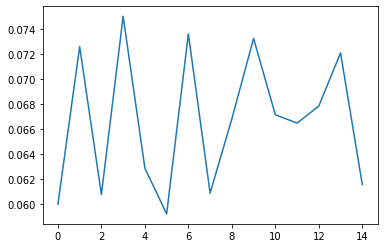

In [ ]:
digits_num = 1000
N = 10**3
m = 15

predict = np.random.randint(digits_num, size=N)
train = np.empty(shape=(N, m))
for i in range(N):
  train[i] = np.random.randint(2, size=m)
rfr = RandomForestClassifier()
rfr.fit(train, predict)
plt.pyplot.plot(rfr.feature_importances_)


Видно, что некоторые монетки более важные, но разница порядка 15%. Увеличу количество монеток.

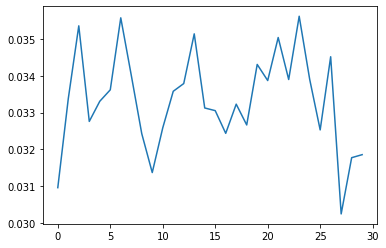

In [ ]:
digits_num = 1000
N = 10**3
m = 30

predict = np.random.randint(digits_num, size=N)
train = np.empty(shape=(N, m))
for i in range(N):
  train[i] = np.random.randint(2, size=m)
rfr = RandomForestClassifier()
rfr.fit(train, predict)
plt.pyplot.plot(rfr.feature_importances_)

Чем больше монеток, тем меньше средний разброс.

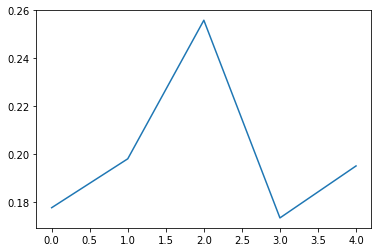

In [ ]:
digits_num = 1000
N = 10**3
m = 5

predict = np.random.randint(digits_num, size=N)
train = np.empty(shape=(N, m))
for i in range(N):
  train[i] = np.random.randint(2, size=m)
rfr = RandomForestClassifier()
rfr.fit(train, predict)
plt.pyplot.plot(rfr.feature_importances_)

Соответственно, чем меньше монеток, тем больше разброс. Тут уже 30%. 

Можно считать это математической моделью суеверий. Настоящие суеверия куда сложнее - например, если монетка в начале стала немного более важной, то на неё будут смотреть больше, и при увеличении N её важность должна расти. Тут же такого не происходит, поскольку модель не зависит от порядка входных данных.

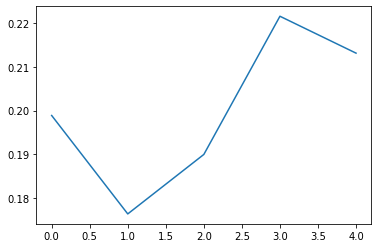

In [ ]:
digits_num = 1000
N = 10**6
m = 5

predict = np.random.randint(digits_num, size=N)
train = np.empty(shape=(N, m))
for i in range(N):
  train[i] = np.random.randint(2, size=m)
rfr = RandomForestClassifier()
rfr.fit(train, predict)
plt.pyplot.plot(rfr.feature_importances_)

Можно попробовать сделать модель сложнее, но я не вижу в этом смысла. Цель этой модели - просто прикинуть, сколько нужно монеток, чтобы полностью описать набор событий (2 * log2(N)). Я не вижу здесь больше простых улучшений, поэтому на этом заканчиваю.